In [1]:
'''
You can name your imports however you want, but it is often useful to add an underscore before the import name.
This will make your life easier when searching through code.
''' 
import matplotlib.pyplot as _plt
import numpy as _np

## Loading Data

There are several modules that will allow you to import and load data. Numpy, pandas, spinmob, etc. The basic idea is the same for all of these module. Data is typically saved in columns any separated by a comma, space, or even a tab. You want assign this data to a variable so it can be maniuplated.

In [3]:
'''
Let's load the data used in the example_plot.py in the first homework assignment.
'''
experimentinput = _np.loadtxt("data.txt", delimiter=",")  # load input data from file, comma separated
experiment = _np.transpose(experimentinput)  # transpose so x, y, y-error are separate row vectors
x_data = experiment[0]  # for clarity, explicitly name vectors
y_data = experiment[1]
y_error = experiment[2]

In [4]:
'''
If you want to look at the data to confirm everything was loaded as expected just call the variable
'''
x_data

array([ 1.   ,  3.111,  5.222,  7.333,  9.444, 11.56 , 13.67 , 15.78 ,
       17.89 , 20.   ])

## Plotting Data Nicely

At this point the data could be plotted in 3 lines of code.

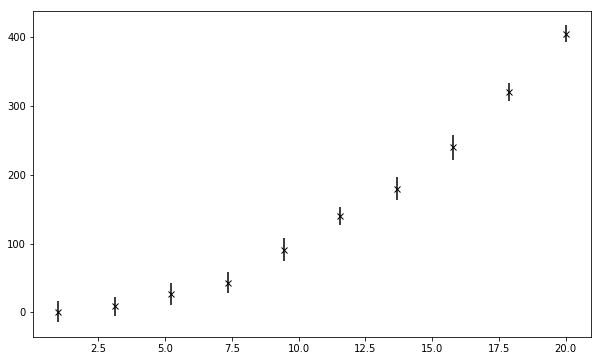

In [6]:
# initialize the subplot
fig, ax = _plt.subplots(figsize=(10, 6))
# we want an errorbar plot
ax.errorbar(x_data, y_data, yerr=y_error, fmt='kx')
# show the plot
_plt.show()

Looks alright, but we never settle for just alright! Let's clean this up a bit. 

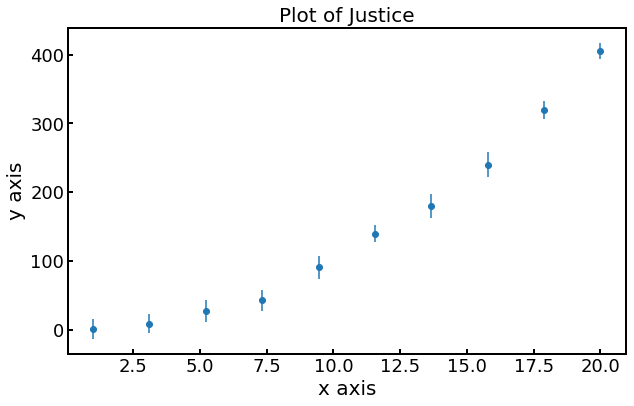

In [18]:
fig, ax = _plt.subplots(figsize=(10, 6))

# we can change what marker is used and what size
ax.errorbar(x_data, y_data, yerr=y_error, fmt='o', markersize=6)

# next lets add some labels
fontsize = 20  # it is useful to define things like fontsize
ax.set_title('Plot of Justice', fontsize=fontsize)
ax.set_xlabel('x axis', fontsize=fontsize)
ax.set_ylabel('y axis', fontsize=fontsize)

# the tick marks are way to small! and they go outwards! let's fix that.
ax.tick_params(axis='both', width=2, length=5, labelsize=18, direction='in')

# let's fix up the border while we are at it
_border_lines = [border_line.set_linewidth(2.) for border_line in ax.spines.values()]

_plt.show()

Much improved.

## Fitting Data

Our plot looks nice, but a nice plot is meaningless if we can't extract anything from it. Let's try fitting some functions to the data.

In [26]:
def linear_fit(x, m, b):
    return m * x + b

def quadratic_fit(x, a, b, c):
    return a * x **2 + b * x + c

In [27]:
# we will be using scipy curve fit to take care of the fitting for us
from scipy.optimize import curve_fit as _curve_fit

In [37]:
# define some default value for the curve fit to start at, m, b
linear_fit_default_values = [20, 0]
# select the fit function, data, and default values
linear_opt, linear_cov = _curve_fit(linear_fit, x_data, y_data, sigma=y_error, p0=linear_fit_default_values)

In [48]:
# check out the fits
linear_opt

array([ 21.86092766, -79.29294742])

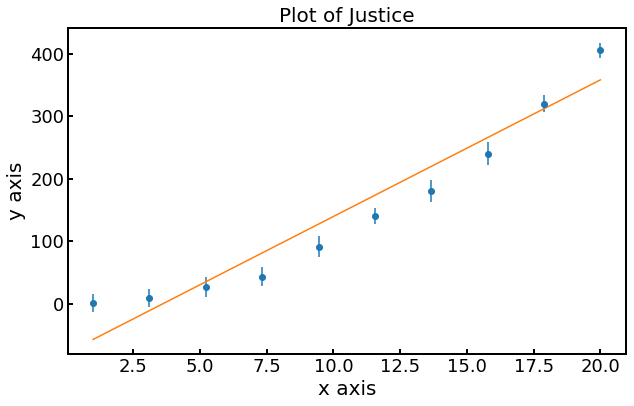

In [39]:
'''
time to plot the data with our fit
'''
fig, ax = _plt.subplots(figsize=(10, 6))

# we can change what marker is used and what size
ax.errorbar(x_data, y_data, yerr=y_error, fmt='o', markersize=6)
ax.plot(x_data, linear_fit(x_data, *opt))

# next lets add some labels
fontsize = 20  # it is useful to define things like fontsize
ax.set_title('Plot of Justice', fontsize=fontsize)
ax.set_xlabel('x axis', fontsize=fontsize)
ax.set_ylabel('y axis', fontsize=fontsize)

# the tick marks are way to small! and they go outwards! let's fix that.
ax.tick_params(axis='both', width=2, length=5, labelsize=18, direction='in')

# let's fix up the border while we are at it
_border_lines = [border_line.set_linewidth(2.) for border_line in ax.spines.values()]

_plt.show()

Not so great. Let's try a quadratic fit.

In [45]:
# define some default value for the curve fit to start at, m, b
quadratic_fit_default_values = [1, 1, 0]
# select the fit function, data, and default values
quad_opt, quad_cov = _curve_fit(quadratic_fit, x_data, y_data, sigma=y_error, p0=quadratic_fit_default_values)
# determine errors
quad_err = _np.sqrt(_np.diag(cov))

In [49]:
# check out the fits and error
quad_opt

array([ 1.04334835, -0.76365096,  0.83453523])

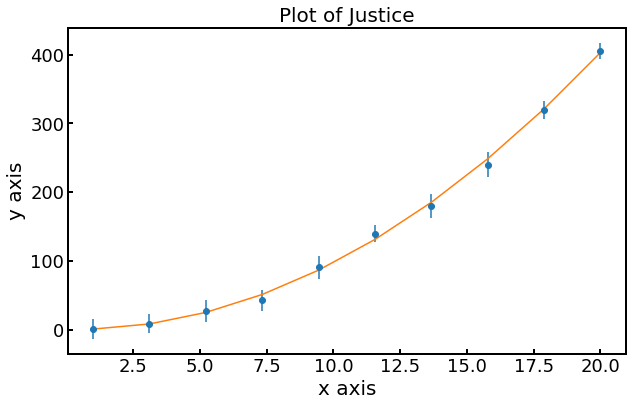

In [50]:
'''
time to plot the data with our fit
'''
fig, ax = _plt.subplots(figsize=(10, 6))

# we can change what marker is used and what size
ax.errorbar(x_data, y_data, yerr=y_error, fmt='o', markersize=6)
ax.plot(x_data, quadratic_fit(x_data, *quad_opt))

# next lets add some labels
fontsize = 20  # it is useful to define things like fontsize
ax.set_title('Plot of Justice', fontsize=fontsize)
ax.set_xlabel('x axis', fontsize=fontsize)
ax.set_ylabel('y axis', fontsize=fontsize)

# the tick marks are way to small! and they go outwards! let's fix that.
ax.tick_params(axis='both', width=2, length=5, labelsize=18, direction='in')

# let's fix up the border while we are at it
_border_lines = [border_line.set_linewidth(2.) for border_line in ax.spines.values()]

_plt.show()

Much better.